  0%|          | 0/25 [00:00<?, ?it/s]

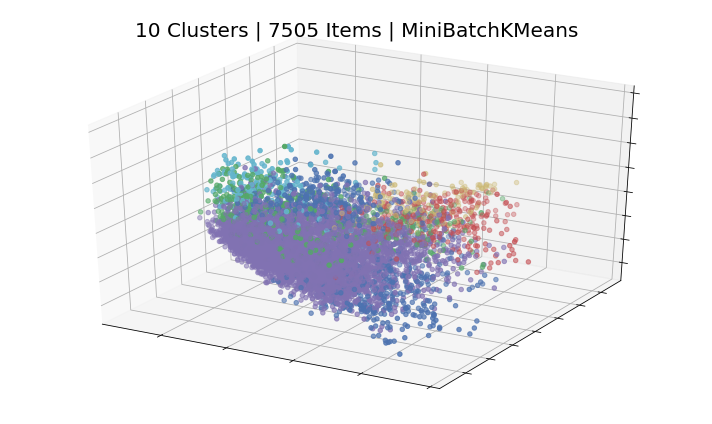

  4%|▍         | 1/25 [00:02<00:48,  2.02s/it]

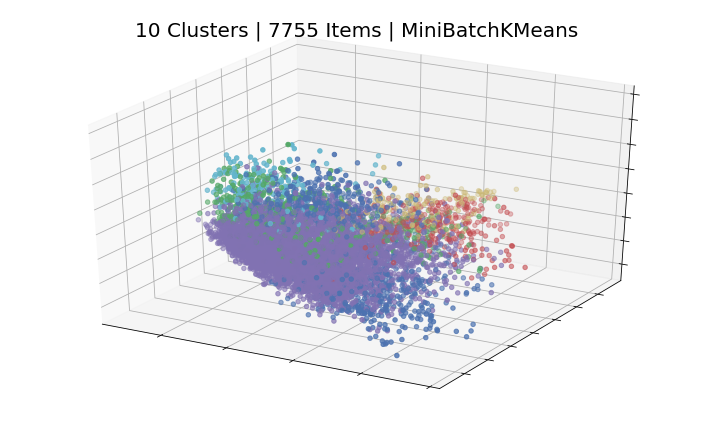

  8%|▊         | 2/25 [00:03<00:45,  1.97s/it]

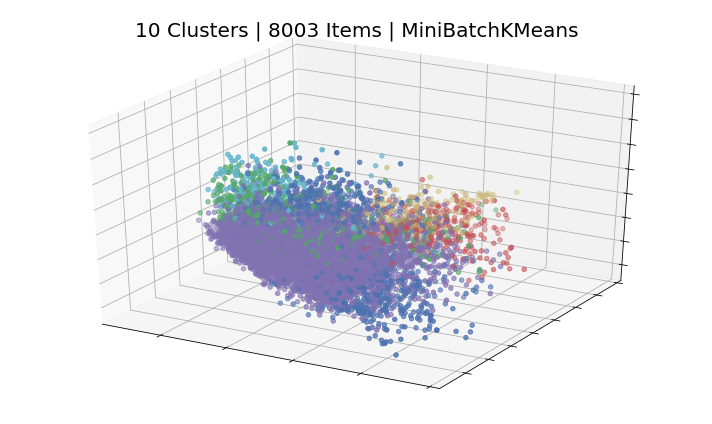

 12%|█▏        | 3/25 [00:05<00:43,  1.99s/it]

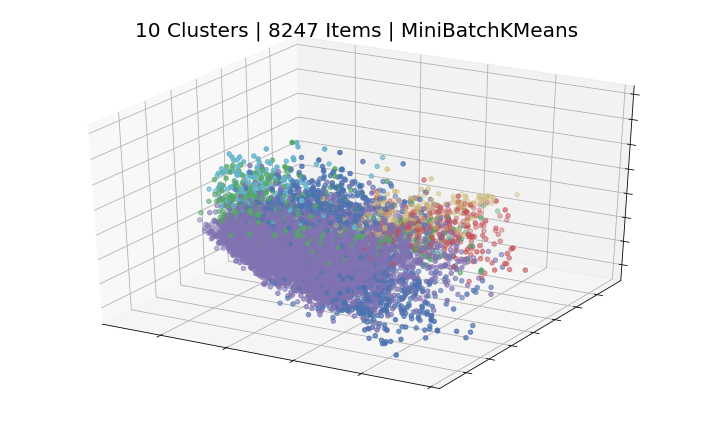

 16%|█▌        | 4/25 [00:07<00:41,  1.99s/it]

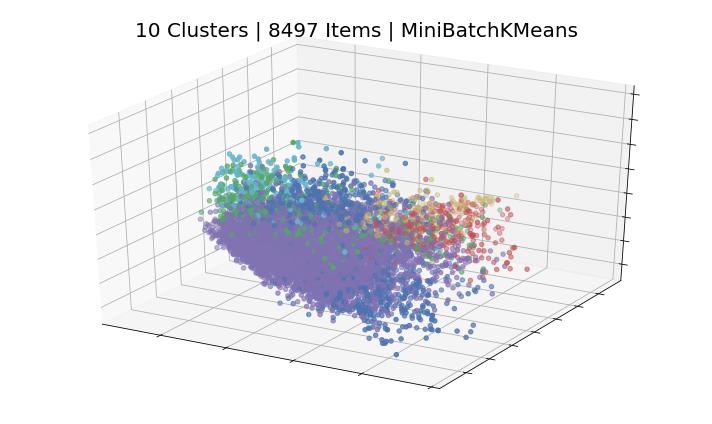

 20%|██        | 5/25 [00:09<00:39,  1.99s/it]

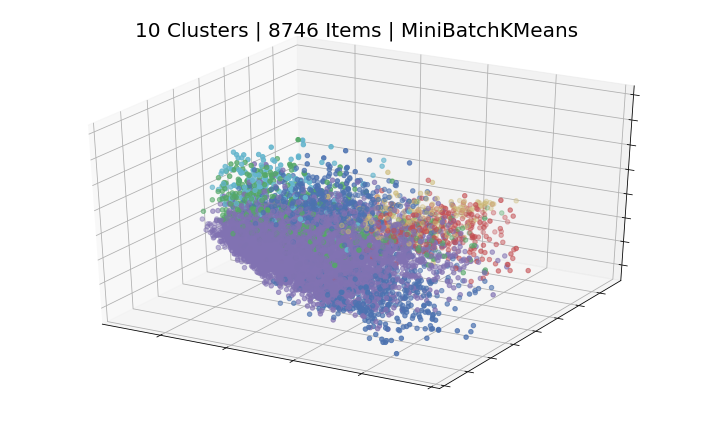

 24%|██▍       | 6/25 [00:12<00:38,  2.00s/it]

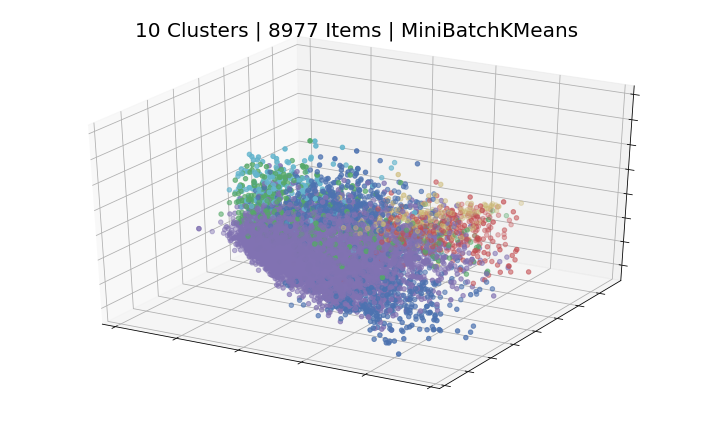

 28%|██▊       | 7/25 [00:14<00:36,  2.00s/it]

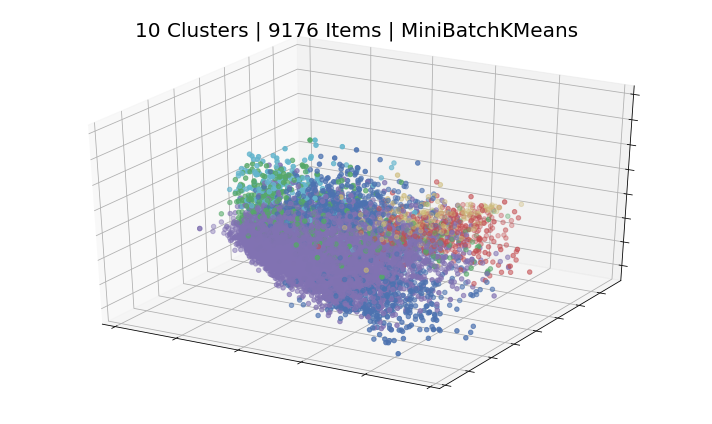

 32%|███▏      | 8/25 [00:16<00:34,  2.01s/it]

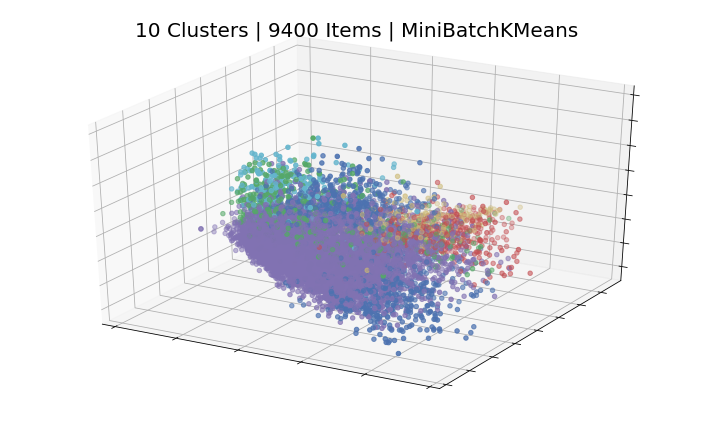

 36%|███▌      | 9/25 [00:18<00:32,  2.01s/it]

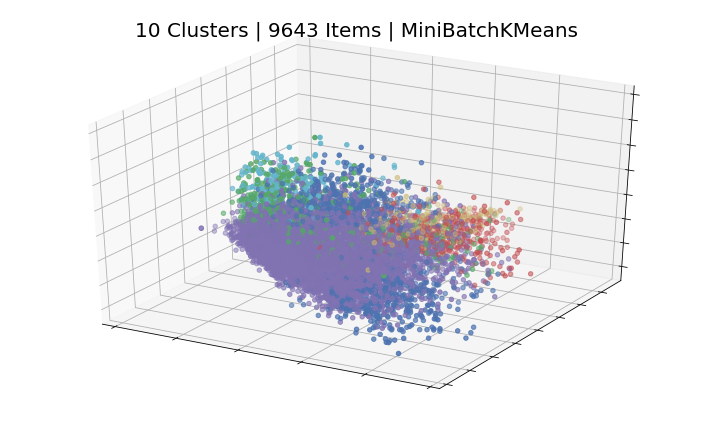

 40%|████      | 10/25 [00:20<00:30,  2.02s/it]

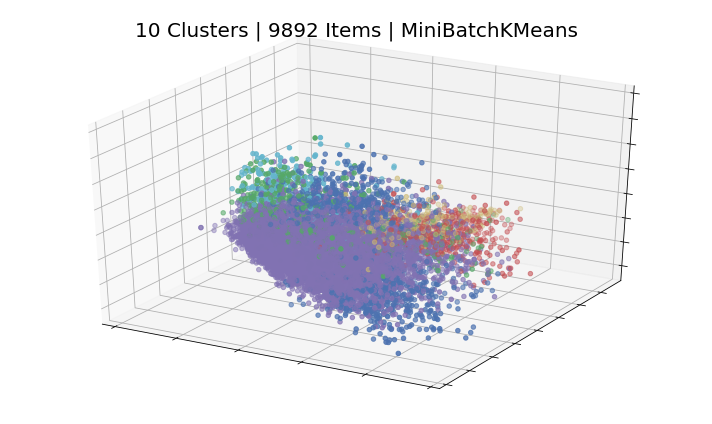

 44%|████▍     | 11/25 [00:22<00:28,  2.04s/it]

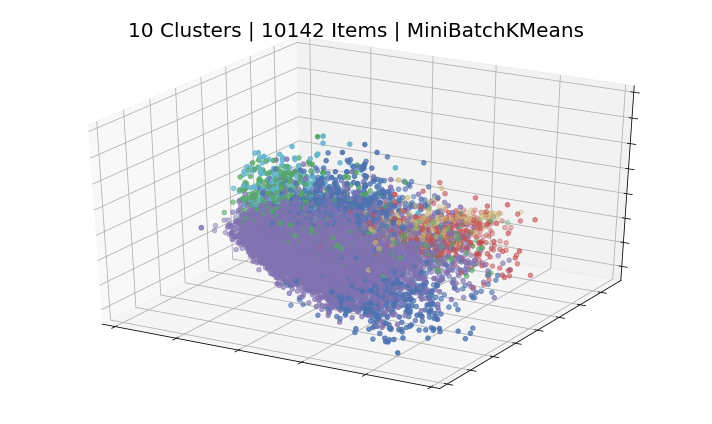

 48%|████▊     | 12/25 [00:24<00:26,  2.06s/it]

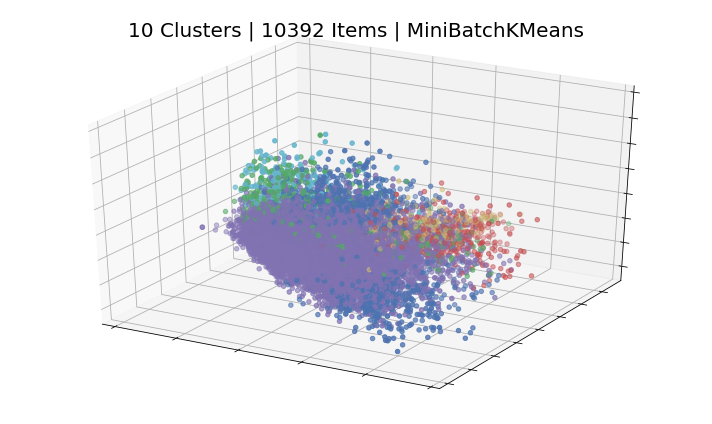

 52%|█████▏    | 13/25 [00:27<00:25,  2.10s/it]

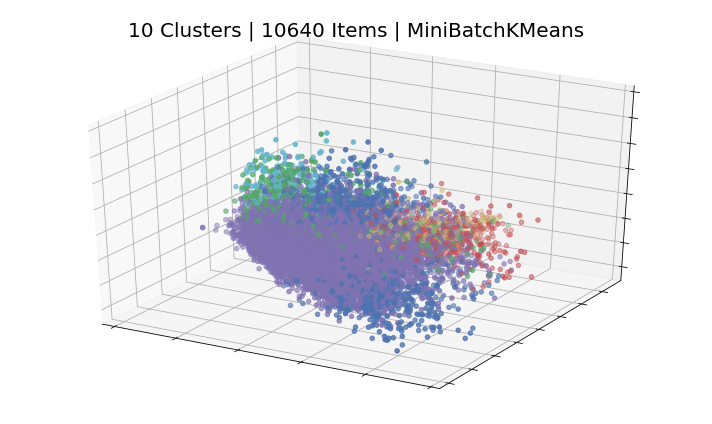

 56%|█████▌    | 14/25 [00:29<00:23,  2.12s/it]

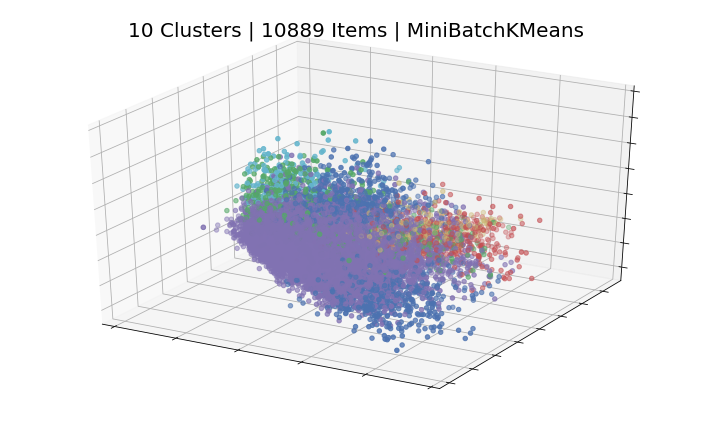

 60%|██████    | 15/25 [00:31<00:21,  2.13s/it]

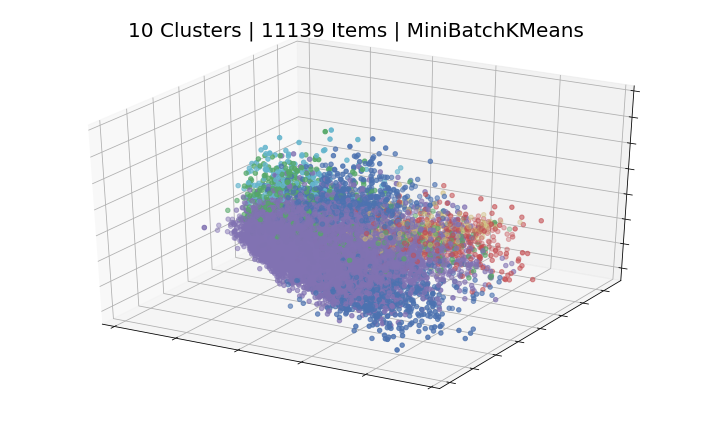

 64%|██████▍   | 16/25 [00:34<00:19,  2.14s/it]

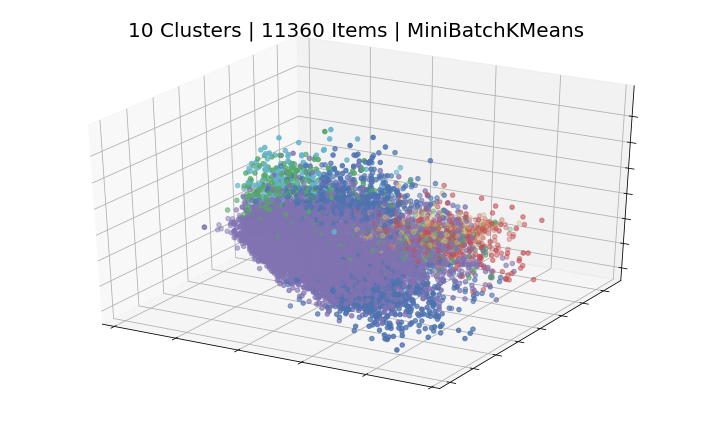

 68%|██████▊   | 17/25 [00:36<00:17,  2.15s/it]

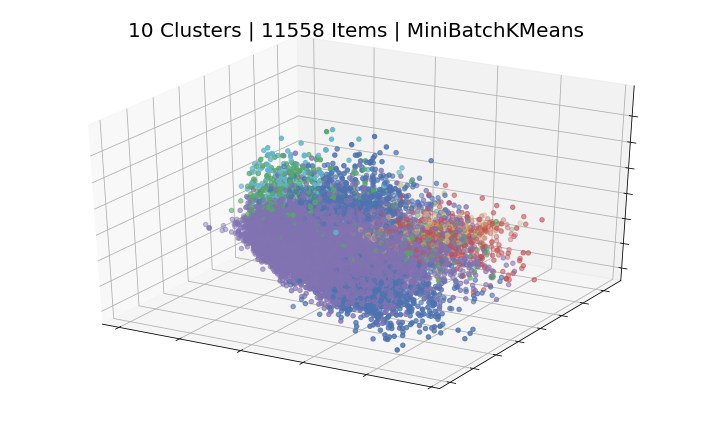

 72%|███████▏  | 18/25 [00:38<00:15,  2.17s/it]

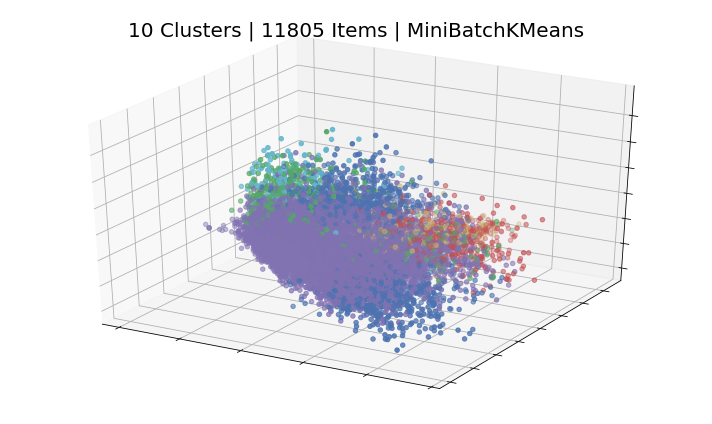

 76%|███████▌  | 19/25 [00:41<00:13,  2.17s/it]

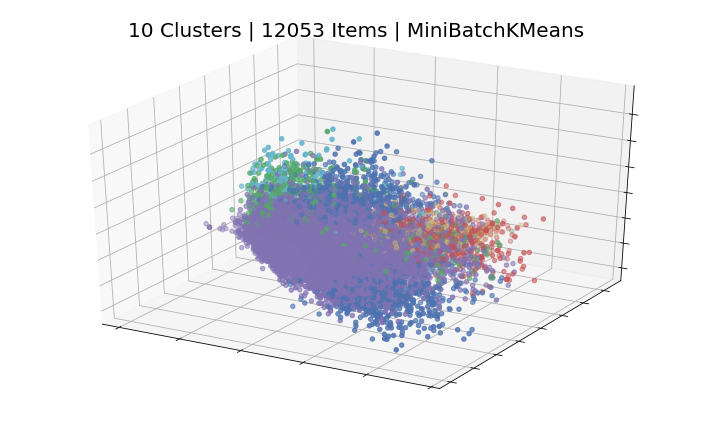

 80%|████████  | 20/25 [00:43<00:10,  2.18s/it]

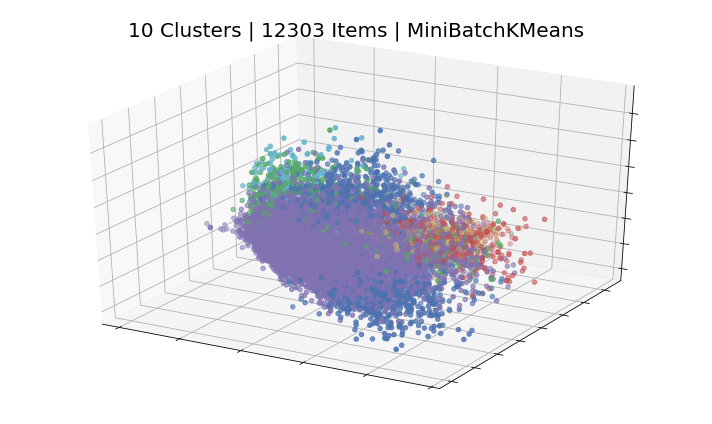

 84%|████████▍ | 21/25 [00:46<00:08,  2.19s/it]

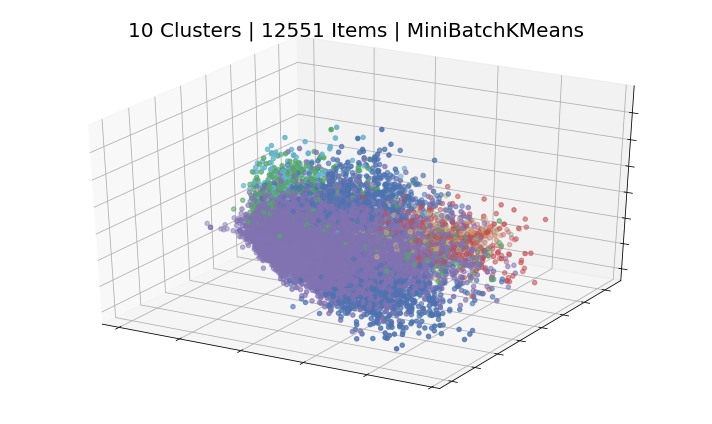

 88%|████████▊ | 22/25 [00:48<00:06,  2.20s/it]

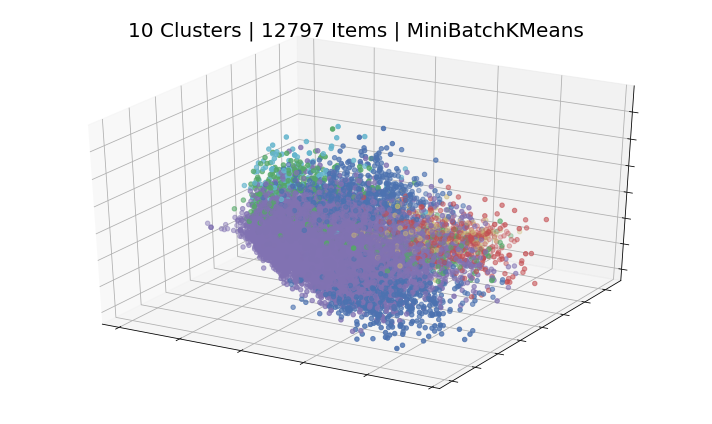

 92%|█████████▏| 23/25 [00:50<00:04,  2.21s/it]

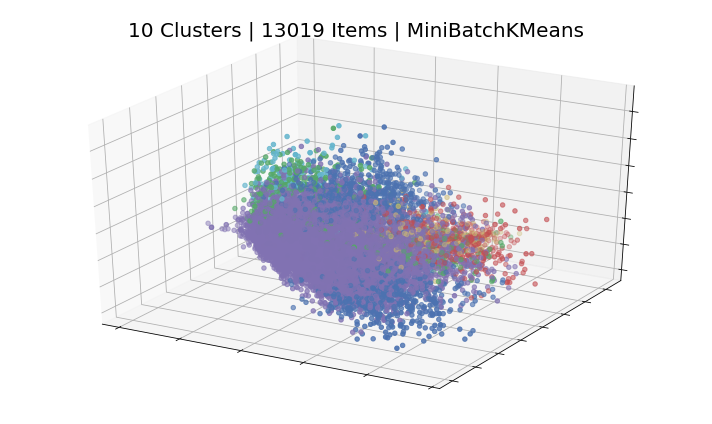

 96%|█████████▌| 24/25 [00:53<00:02,  2.23s/it]

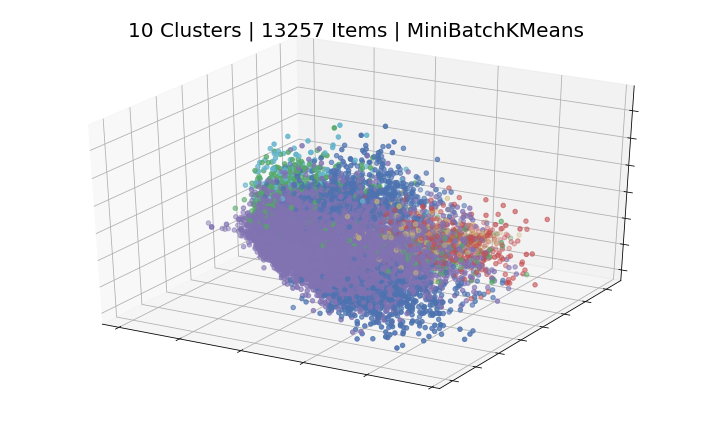

100%|██████████| 25/25 [00:55<00:00,  2.24s/it]


In [18]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from src.clustering import OnlineCluster, Cluster
from src.modules import StreamData

import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm


def get_figure(cluster_class):
    return cluster_class.viz3D(cluster_class.results, matrix=cluster_class.viz_matrix)

def save_figure(online):
    fig = online.viz3D(online.results, matrix=online.plot_matrix)
    fig.savefig('../data/plots/out-%s.png' % (str(datetime.now()).split(' ')[1]))
    plt.close()
    

# Initialize streamer, cluster
streamer = StreamData(filename='../data/baphx-radio.csv', chunk=250, use_column='sentences')
init_text = streamer._init_data(2)
online = OnlineCluster(text=list(init_text.sentences), method='kmeans', n_clusters=10)

# Update for 25 batches
for idx in tqdm(range(25)):
    
    # Get new batch
    new_text = streamer()
    
    # Predict
    labels = online.predict(list(new_text.sentences))
    
    # Plot
    fig = online.viz3D()
    
    # Optional save figure
    #save_figure(online)